# Introduction

League of Legends, commonly referred as LoL or League by the community, is a MOBA (Multiplayer Online Battle Arena) by the Californian company Riot Games. The goal  of this paper is to use data from many games with the purpose of finding common characteristics for wins and losses. This would be the first step in finding possible correlations and/or causations between the outcome of a game and team behavior and priorities.

It is not necessary to know the game in depth in order to understand this paper, although basic knowledge is provided. There are two teams, each team is composed of five players, each player controls one “champion”. The two teams battle each other until they destroy the enemy base, called “nexus”.

The game was released in 2009 and since its release it has kept growing in popularity, since 2012 it has become by far the most played game in the world (excluding mobile games) with over 100 million unique active players a month it takes a massive chunk of the share on PC gaming (Jeremiah Paul, 2017) (GameCentral, 2017) (Statista, 2017).

The game is incredibly popular in online media. League’s content is predominant in video streaming services such as Twitch and Youtube (Gamasutra, 2015) (Tony Polanco, 2016). It has spurred many statistics services regarding the game such as leagueofgraphs.com, Champion.gg,lolking.net, OP.GG and countless others thanks to Riot Games providing APIs to their database. There are also online paid websites that offer coaching to people who want to learn the game for example Leaguecoaching.gg, lol-academy.net and others, it is also common for people to pay professional players for private lessons.

The game uses the freemium model, in other words, downloading and playing the game is free, however, cosmetic unlockable content needs to be bought. The champions are necessary to play the game, those can be acquired for free by playing games and using the in game currency or they can be bought with real money. Therefore, League of Legends is an incredibly lucrative game; Riot games develops only this game and its worth is US$1.6 billion (2015 estimate) (Fortune,2015).

This paper is focused on the competitive aspect of LoL; in fact, the game has an enormous eSport scene, one of the largest by many metrics including spectators, following, tournaments prize money and general players’ salary (David Segal, 2014). In 2016 League had $29,203,916 USD in prize money, 4,083 Players, and 1,718 tournaments (Wyatt Fossett, 2016).

It is clear why understanding how to win a game can be not only interesting from a competitive standpoint but also from a financial point of view. Understanding the game, playing many hours and fine intuition are definitively crucial to win games and this is true for any sports or e-sports; however, data analysis is an incredible tool that can shed light on misconceptions or otherwise provide a powerful insight on win conditions.


# Data

The data used is a database of over 50,000 ranked EUW (West Europe LoL Server) games containing the columns (variables):

 •	Game ID
•	Creation Time (in Epoch format)
•	Game Duration (in seconds)
•	Season ID
•	Winner (1 = team1, 2 = team2)
•	First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
•	Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
•	The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
•	The 5 bans of each team (Again, champion IDs are used)

The accuracy of the data is guaranteed as it was derived from the Riot Games API.
With the many variables in this dataset and the big sample size it is possible to see what is more likely to happen in a win and what is more likely in a loss.

The database has been obtained from Kaggle.com then cleaned with Python by removing unnecessary columns, renaming them and change the champion and summoner spells IDs with their respective names in order to make the dataset more readable and easily analysable (Jay Tegge, 2017).

The data consists in a csv file with three json files that are only used to clean up the data.

Before trying to find out common traits with wins and losses and try to figure out what the data can tell us in order to win a game we can start with a few pieces of descriptive statistics so that we get an understanding of the data across the whole dataset. 

The win rate for the blue team is 50.6% and for the red team is 49.4 %, this disparity may be random but there is a common understanding in the LoL community that blue team may be very slightly advantaged because of the way the game map is visualized. Blue team fights from the bottom of the screen up while the red team fights from the top of the screen to the bottom; the H.U.D. is located on the bottom of the screen thus ever so slightly blocking the vision for the red team. This piece of data is actually very constant in different analytics (League of Graphs, 2017).
 


Fig.1

# Analysis

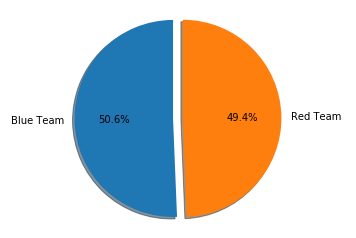

In [1]:
from IPython.display import Image
Image(filename="Fig1.png",width=1000,height=1000)

The following are considered “objectives” in the game, I am going to take the average per game considering both teams: tower kills is 5.6 per game, inhibitor kills is 1 per game, baron kills is 0.39 per game, dragon kills is 1.38 per game and finally the average rift herald kills per game is 0.24.

The following is a bar chart with total champion pick and bans for the whole dataset.

Fig.2

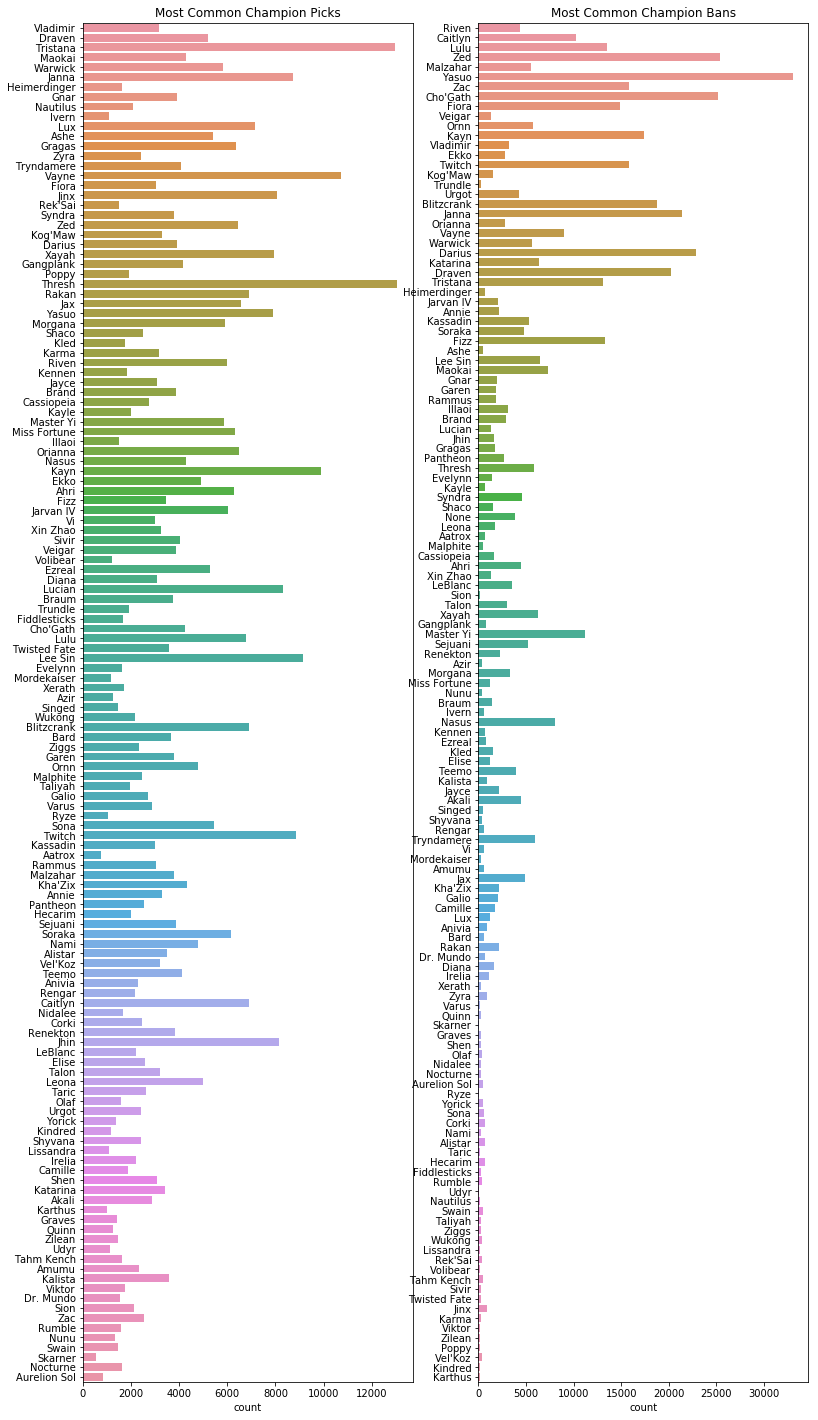

In [2]:
Image(filename="Fig2.png",width=1000,height=1000)

Among the most popular champions there are Tristana, Thresh, Vayne and Kayne.
Among the champions that people don’t want to play against the most there are Yasuo, Zed, Cho’Gath, Darius, Janna and Draven.

The next bar graph shows the summoner spells that are more popular. Each player selects 2 summoner spells at the beginning of the game and sticks with them for the whole match. We can see that Flash is very popular; this is a good way to check what should be balanced from the developer perspective, maybe Flash should see its 

Fig.3

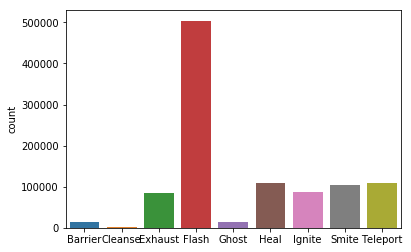

In [3]:
Image(filename="Fig3.png",width=1000,height=1000)

In Fig.4 there is a density plot obtained in R with the game length, we can see the average is around 30 minutes and there is a spike around 3 minutes this is due to the fact that when a player does not connect to the game it is possible to nullify the match at the 3-minute mark.There is also a smaller peak around the fifteen-minute mark, this is explained by the fact that it is possible to surrender tha game only after fifteen minutes. This density plot was done with a sample of the data of about one third of the total in order to simplify data handling. The mean of the game length for the total 51489 games sample size is 30.5 minutes which is very close to the one in the density curve.

Fig.4

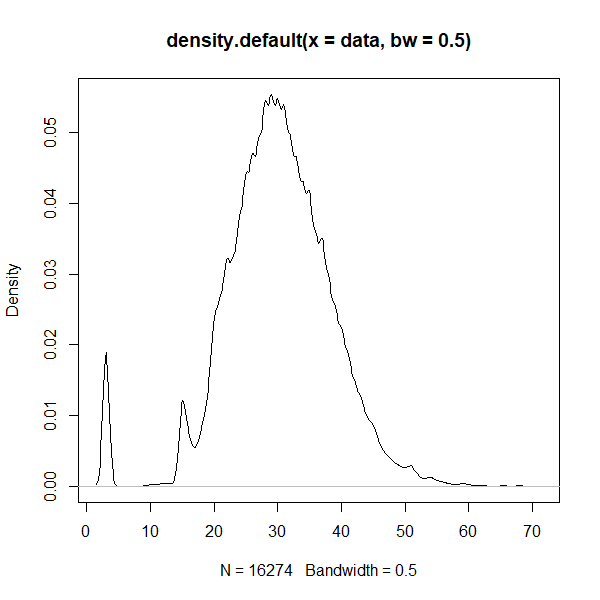

In [4]:
Image(filename="Fig4.png",width=1000,height=1000)

Now it is the time to relate different variables to the games that resulted in victory compared to the ones that resulted in a loss.

The first variable I am going to relate is the first tower. Getting the first tower generally shows that you have more pressure on the map; moreover, it gives the team a global gold bounty that will put them ahead of the opposing team. The following two bar graphs will correlate how many times a team gets the first tower kill when they win and how many times they get it when they lose.

Fig.5 & Fig.6

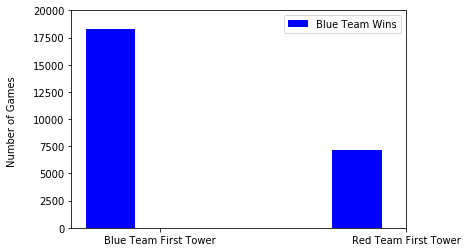

In [5]:
Image(filename="Fig5.png",width=1000,height=1000)

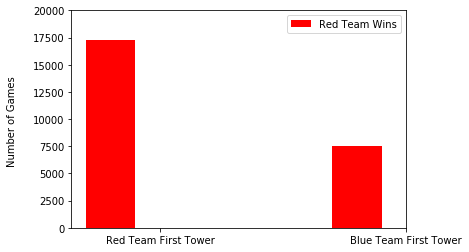

In [6]:
Image(filename="Fig6.png",width=1000,height=1000)

The trends are very similar, getting the first tower will give you roughly more than double the chance of winning the game. To what extent the first tower gold is correlates to or cause victory? The answer is beyond the scope of the paper and could probably never be found out for sure. What is certain is that there is a strong correlation.

The next relationship between variables will be between winning and the amount of flashes in the team. We have already seen that Flash is a very popular summoner spell in Fig.3, the question is: Does having less Flashes in a team reduce your chance of winning?

 Fig.7

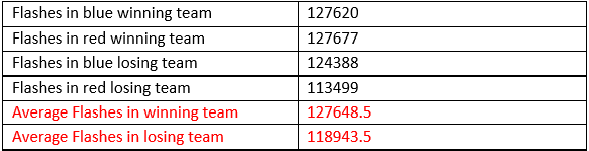

In [7]:
Image(filename="Fig7.png",width=350,height=350)


The correlation seems very weak but this may still be considered real and not due to randomness, especially considering the large sample size. It seems that having a lower amount of flashes contributes to lowering the chance of winning..

A final relationship will be between one of the most important objectives of the game the “Baron Nashor”, this objective is a high risk high reward play. It allows teams that are ahead to finish up the game and for the teams that are behind, it allows them to stall out the game and recover. It is easier to be taken by the team that is winning as it often forces the two teams to fight.

I will now show how many barons the winner and loser team achieved on the sample. It is understood by the community that due to the logistical position on the map, the baron is more easily achieved by the blue team; this is balanced out by the fact that the red team should have an easier time taking another objective, the dragon, which we will not discuss here. However, the data from online resources do not often mirror this conviction.

FIg.8 & Fig.9

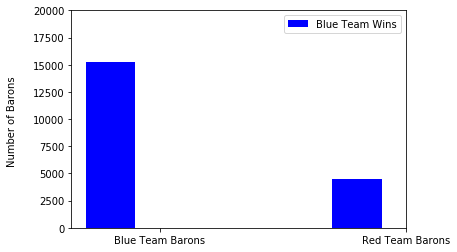

In [8]:
Image(filename="Fig8.png",width=1000,height=1000)

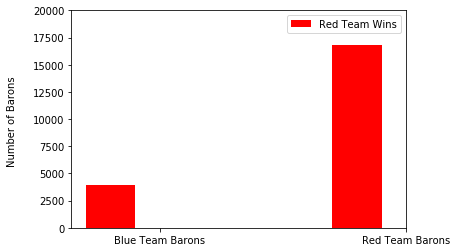

In [9]:
Image(filename="Fig9.png",width=1000,height=1000)

# Conclusion

In conclusion this paper has shown how data can be used to gain insight into the game League of Legends and how it can be used as a baseline to create future strategies. Data analysis allows the strategy maker to understand scientifically the extent to which things work out or do not work out.

Here it was seen that there is a slight bias in win rate in favor of the blue team (Fig.1), then It was displayed that some champions are overwhelmingly more popular or more hated than others (Fig.2). Some summoner spells seem like in need of a rebalancing from the developers as some are chosen extremely frequently and others are almost ignored (Fig.3). It was shown that game length follows a rough normal distribution with the exclusion of the three-minute peak which correspond in the games that have failed to conclude as one of the player disconnected (Fig.4). 

After that the paper focused on looking a few characteristics of winning teams compared to the losing ones. The first characteristic examined was getting the first tower kill, an objective that shows how much pressure a team is putting on the map, this objective also grants global gold to the team, therefore, it was found that there is a high correlation between first tower and winning; this objective should be treated as a priority when creating winning strategies. The second characteristic was how many total flashes (Summoner Spell) were chosen by a team; the correlation between this and winning is very weak even though it is such a popular Summoner Spell. It seems like even if it may be a very strong option, not choosing it will not decrease your chance of winning drastically. Finally, the correlation between winning and the total number of Barons killed was examined. Here there is a very strong relationship between these two variable. Baron seems an incredibly strong objective that cannot be overlooked.

The visualization methods chosen were mainly bar graphs as the data was composed of primarily double bar graphs in order to emphasize the difference between blue and red team. And it was the best option for showing the how popular were so many different champions; moreover, the data variables were mainly nominal. A density function was used for the only ratio variables, the game length.

E-sports is becoming more and more prominent, the amount of data that the companies give out with their APIs is extremely large; therefore, the possibilities are endless. By mastering the usage of the Riot APIs it would be possible to create very deep data analysis and correlate many more variables. For example, how does the win rate of different champions change with game length? What is the sweet spot for a great champion composition that allows a team to be strong in early and in late game? Moreover,data on APM (Action per minute) could be collected in order to inquire if more mechanically challenging champions disadvantage lower skilled players and advantage higher skilled players. Finally, a more comprehensive list of the impact of the predictor of wins could be created with the help of machine learning and statistical methods such as regression.


# Bibliography

Database from: Jay Tegge, 2017. League of Legends data analysis [online] Available at: https://www.kaggle.com/jaytegge/league-of-legends-data-analysis/data Accessed 07/01/2018

David Segal, 2014. Behind League of Legends, E-Sports’s Main Attraction [online] Available at: https://www.nytimes.com/2014/10/12/technology/riot-games-league-of-legends-main-attraction-esports.html Accessed 01/01/2018 Accessed 01/01/2018

Fortune,2015. ESports Are Driving Digital Video Game Sales [online] Available at: http://fortune.com/2016/01/27/esports-drive-digital-video-game-sales/ Accessed 01/01/2018

Gamasutra, 2015. Twitch's 10 most-watched games of 2015 [online] Available at: https://www.gamasutra.com/view/news/265668/Twitchs_10_mostwatched_games_of_2015.php Accessed 01/01/2018
GameCentral, 2017. League Of Legends is still the biggest video game in the world, [online]Available at: http://metro.co.uk/2017/08/04/league-of-legends-is-still-the-biggest-video-game-in-the-world-6828565/ Accessed 01/01/2018

Jeremiah Paul, 2017. By The Numbers: Most Popular Online Games Right Now, [online] Available at: https://nowloading.co/posts/3916216 Accessed 07/01/2018

League of Graphs, 2017[online] Available at: https://www.leagueofgraphs.com/rankings/blue-vs-red Accessed 01/01/2018
Statista, 2015. Most played PC games on gaming platform Raptr in November 2015, by share of playing time, [online] Available at: https://www.statista.com/statistics/251222/most-played-pc-games/ Accessed 01/01/2018

Tony Polanco, 2016. The 10 most streamed video games this week [online] Available at: https://www.geek.com/games/the-10-most-streamed-video-games-this-week-1646668/ Accessed 01/01/2018

Wyatt Fossett, 2016. How Videogames Became a Sport, and Why They’re Here to Stay (Hint: Money!) [online] Available at: https://techvibes.com/2016/06/21/how-videogames-became-a-sport-and-why-theyre-here-to-stay-hint-money Accessed 01/01/2018
